<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  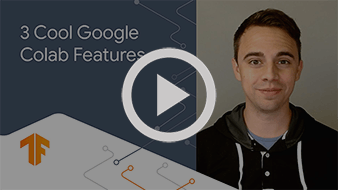
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Research question**: What should I do in order to create a successful startup?

## This leads to questions such as the following, which will be answered in the upcoming analysis:
### - Which university should I go to?
### - What are the most appealing sectors?
### - How long should I expect to stay private? How does that expected time change from sector to sector?
### - Where should I locate my firm?
### - How much financing am I expected to get? How does that depend on the funding stage and on the country?




## Firstly, I display some general information about the dataset.

           LOCATION  LOCATION_COUNTS
44    United States              627
43   United Kingdom               64
16            India               60
8             China               29
14          Germany               29
5            Canada               27
19           Israel               13
13           France               10
36           Sweden                9
37      Switzerland                7


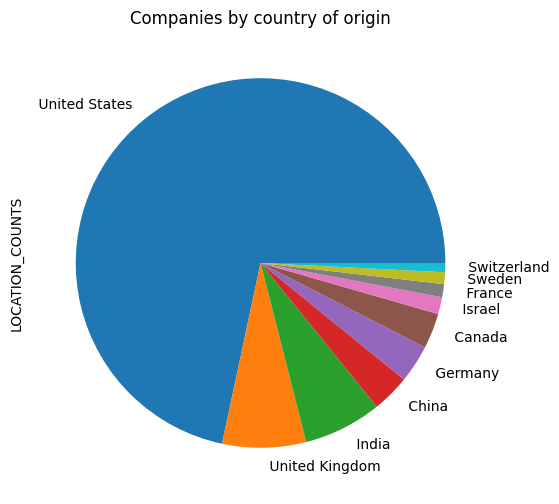

In [58]:
import pandas as pd

df_company_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="COMPANY")
df_comp = df_company_dup.drop_duplicates()


# Let's get the year of the FOUNDED_ON and EXITED_ON columns and then convert them into int
exited_on = df_comp['EXITED_ON'].str[-4:]
founded_on = df_comp['FOUNDED_ON'].str[-4:]

df_company = df_comp.drop(columns = ["FOUNDED_ON", "EXITED_ON"])

df_company.insert(3, "FOUNDED_ON", founded_on)
df_company.insert(4, "EXITED_ON", exited_on)

df_company["EXITED_ON"] = pd.to_numeric(df_company['EXITED_ON'], errors='coerce')
df_company["FOUNDED_ON"] = pd.to_numeric(df_company['FOUNDED_ON'], errors='coerce')

df_company['EXITED_ON'].fillna(-1, inplace=True)
df_company['FOUNDED_ON'].fillna(-1, inplace=True)

df_company['FOUNDED_ON'] = df_company['FOUNDED_ON'].astype(int)
df_company['EXITED_ON'] = df_company['EXITED_ON'].astype(int)


# Let's now remove very old companies, for instance the ones created before 1980
condit = (df_company["FOUNDED_ON"] >= 1980)
df_company = df_company[condit]


# Let's now get the names of the countries from the LOCATION column and count their appearences.
df_company_1 = df_company['LOCATION'].str.split(',').str.get(-1).to_frame()
country_counts = df_company_1.groupby('LOCATION').size().reset_index(name='LOCATION_COUNTS').sort_values(by="LOCATION_COUNTS", ascending=False)

top_10_rows = country_counts.head(10)
print(top_10_rows)

top_10_rows.plot.pie(y='LOCATION_COUNTS', labels=top_10_rows['LOCATION'], legend=False, figsize=(6, 6))
plt.title('Companies by country of origin')
plt.show()

We can see that the overwhelming majority of the companies in the dataset were based in the United States, followed by the UK, India, Germany and China from a long distance.



## **QUESTION 1**: What are the most successful universities?

### **A)** Which universities from the dataset have "generated" the most CEOs/Founders?

                 ATTENDED_SCHOOLS_UNIQUE  NUMBER_CEOS_FOUNDERS
0                    Stanford University                  56.0
1                     Harvard University                  42.0
2             University of Pennsylvania                  28.0
3  Massachusetts Institute of Technology                  26.0
4     University of California, Berkeley                  20.0


Text(0.5, 1.0, 'Top 5 Universities by Number of CEOs/Founders')

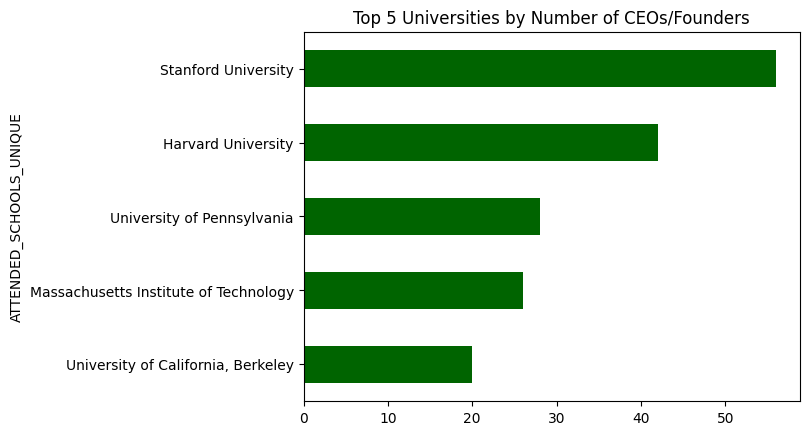

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from itertools import combinations
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

df_employees_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="EMPLOYEE")
df_employees = df_employees_dup.drop_duplicates()


# Now I get the job titles that contain either the word CEO or Founder and then remove the entries that do not have na in the school column
cond = (df_employees["JOB_TITLES"].str.contains("CEO|Founder"))
df_ceos_founders = df_employees[cond]
df_ceos_founders_2 = df_ceos_founders.dropna(subset="ATTENDED_SCHOOLS")


# Given that the column ATTENDED_SCHOOLS sometimes contains more than one university per entry, I need to cleanse the dataset. For that, I will import an external list of all of the universities in the world, and then I will try to map it to our dataset and proceed from there
np_unique_universities = df_ceos_founders_2.groupby("ATTENDED_SCHOOLS").count().reset_index().sort_values("ATTENDED_SCHOOLS", ascending=False)
np_unique_universities.rename(columns={"ATTENDED_SCHOOLS": "ATTENDED_SCHOOLS_UNIQUE", "EMPLOYEE_MD5": "NUMBER_CEOS_FOUNDERS"}, inplace=True)
np_unique_universities.drop(columns={"JOB_TITLES", "COMPANY_NAME"}, inplace=True)
np_unique_universities['ATTENDED_SCHOOLS_UNIQUE'] = np_unique_universities['ATTENDED_SCHOOLS_UNIQUE'].str.strip()

df_world_unis = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/world-universities.csv")
df_world_unis = df_world_unis.iloc[:, 1]
df_world_unis = pd.DataFrame(df_world_unis.values, columns=["WORLD_UNIVERSITIES"])
cleansing_unis = pd.merge(np_unique_universities, df_world_unis, how="left", left_on="ATTENDED_SCHOOLS_UNIQUE", right_on="WORLD_UNIVERSITIES")


# I will save the matched universities in another dataset and try again with the not-matched ones
matched_unis = cleansing_unis[cleansing_unis["WORLD_UNIVERSITIES"].notna()]
matched_unis.drop(columns={"ATTENDED_SCHOOLS_UNIQUE"}, inplace=True)
matched_unis.rename(columns={"WORLD_UNIVERSITIES": "ATTENDED_SCHOOLS_UNIQUE"}, inplace=True)

not_matched_unis = cleansing_unis[cleansing_unis["WORLD_UNIVERSITIES"].isna()]
not_matched_unis.drop(columns={"WORLD_UNIVERSITIES"}, inplace=True)


# I will now try to match the universities that have not been matched yet
not_matched_unis_sorted = not_matched_unis.sort_values("NUMBER_CEOS_FOUNDERS", ascending=False).reset_index().drop(columns={"index"})


# We can now start to develop a mapping table by comparing the universities we see in this list with the ones we find in the external csv file. I will only do this for the universities with a count of 3 or higher, and then drop the rest due to time concerns
mapping = ["Massachusetts Institute of Technology", "Indian Institute of Technology, Delhi", "University of Texas at Austin", "Technische Universität München", "Technion - Israel Institute of Technology", "University of Maryland (System)", "Brigham Young University", "Harvard University", "University of Pennsylvania", "Wissenschaftliche Hochschule für Unternehmensführung, Otto-Beisheim Hochschule", "Universität Hamburg", "University of Illinois at Urbana-Champaign"]
df_uni_mapping = pd.DataFrame(mapping)
not_matched_unis_2 = pd.concat([not_matched_unis_sorted, df_uni_mapping], axis=1).rename(columns={0: "WORLD_UNIVERSITIES"})
condition = (not_matched_unis_2["NUMBER_CEOS_FOUNDERS"] >= 3)
not_matched_unis_2 = not_matched_unis_2[condition]

not_matched_unis_2.drop(columns={"ATTENDED_SCHOOLS_UNIQUE"}, inplace=True)
not_matched_unis_2.rename(columns={"WORLD_UNIVERSITIES": "ATTENDED_SCHOOLS_UNIQUE"}, inplace=True)

matched_unis_2 = pd.merge(matched_unis, not_matched_unis_2, on="ATTENDED_SCHOOLS_UNIQUE", how="outer")

matched_unis_2['NUMBER_CEOS_FOUNDERS'] = matched_unis_2['NUMBER_CEOS_FOUNDERS_y'].add(matched_unis_2['NUMBER_CEOS_FOUNDERS_x'], fill_value=0)
matched_unis_2.drop(columns={"NUMBER_CEOS_FOUNDERS_x", "NUMBER_CEOS_FOUNDERS_y"}, inplace=True)
matched_unis_2_sorted = matched_unis_2.sort_values("NUMBER_CEOS_FOUNDERS", ascending=False).reset_index().drop(columns={"index"})


# We see that, so far, the most popular universities are Stanford University, Massachusetts Institute of Technology, University of California, Berkeley, Harvard University, University of Pennsylvania, and Yale University. I will try to find those universities in the list that has not been matched yet
conditi = (not_matched_unis_sorted["NUMBER_CEOS_FOUNDERS"] < 3)
not_matched_unis_3 = not_matched_unis_sorted[conditi]


word_to_count = "Berkeley"
not_matched_unis_3['COUNTED_UNI'] = not_matched_unis_3['ATTENDED_SCHOOLS_UNIQUE'].str.count(word_to_count)
column_sum_berk = not_matched_unis_3['COUNTED_UNI'].sum()
column_sum_berk_df = pd.DataFrame({'NUMBER_CEOS_FOUNDERS': [column_sum_berk]})
column_sum_berk_df["ATTENDED_SCHOOLS_UNIQUE"] = "University of California, Berkeley"
not_matched_unis_3.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Stanford"
not_matched_unis_3['COUNTED_UNI'] = not_matched_unis_3['ATTENDED_SCHOOLS_UNIQUE'].str.count(word_to_count)
column_sum_st = not_matched_unis_3['COUNTED_UNI'].sum()
column_sum_st_df = pd.DataFrame({'NUMBER_CEOS_FOUNDERS': [column_sum_st]})
column_sum_st_df["ATTENDED_SCHOOLS_UNIQUE"] = "Stanford University"
not_matched_unis_3.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "MIT"
not_matched_unis_3['COUNTED_UNI'] = not_matched_unis_3['ATTENDED_SCHOOLS_UNIQUE'].str.count(word_to_count)
column_sum_mit = not_matched_unis_3['COUNTED_UNI'].sum()
column_sum_mit_df = pd.DataFrame({'NUMBER_CEOS_FOUNDERS': [column_sum_mit]})
column_sum_mit_df["ATTENDED_SCHOOLS_UNIQUE"] = "Massachusetts Institute of Technology"
not_matched_unis_3.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Harvard"
not_matched_unis_3['COUNTED_UNI'] = not_matched_unis_3['ATTENDED_SCHOOLS_UNIQUE'].str.count(word_to_count)
column_sum_h = not_matched_unis_3['COUNTED_UNI'].sum()
column_sum_h_df = pd.DataFrame({'NUMBER_CEOS_FOUNDERS': [column_sum_h]})
column_sum_h_df["ATTENDED_SCHOOLS_UNIQUE"] = "Harvard University"
not_matched_unis_3.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Yale"
not_matched_unis_3['COUNTED_UNI'] = not_matched_unis_3['ATTENDED_SCHOOLS_UNIQUE'].str.count(word_to_count)
column_sum_yale = not_matched_unis_3['COUNTED_UNI'].sum()
column_sum_yale_df = pd.DataFrame({'NUMBER_CEOS_FOUNDERS': [column_sum_yale]})
column_sum_yale_df["ATTENDED_SCHOOLS_UNIQUE"] = "Yale University"
not_matched_unis_3.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "University of Pennsylvania"
not_matched_unis_3['COUNTED_UNI'] = not_matched_unis_3['ATTENDED_SCHOOLS_UNIQUE'].str.count(word_to_count)
column_sum_penn = not_matched_unis_3['COUNTED_UNI'].sum()
column_sum_penn_df = pd.DataFrame({'NUMBER_CEOS_FOUNDERS': [column_sum_penn]})
column_sum_penn_df["ATTENDED_SCHOOLS_UNIQUE"] = "University of Pennsylvania"
not_matched_unis_3.drop(columns={"COUNTED_UNI"}, inplace=True)


# Now I append the new CEO counts to our matched_unis_2 list and group the universities
final_df = pd.concat([matched_unis_2, column_sum_penn_df, column_sum_yale_df, column_sum_h_df, column_sum_mit_df, column_sum_st_df, column_sum_berk_df], ignore_index=True)
final_df_gr = final_df.groupby("ATTENDED_SCHOOLS_UNIQUE")["NUMBER_CEOS_FOUNDERS"].sum().reset_index(name='NUMBER_CEOS_FOUNDERS')
final_df_sorted = final_df_gr.sort_values("NUMBER_CEOS_FOUNDERS", ascending=False).reset_index(drop=True)


# Now I get the top 5 universities and display them in a graph
final_df_sorted_top5 = final_df_sorted.head(5)
print(final_df_sorted_top5)


# Now I plot the results
color_r = ["darkgreen"]
final_df_sorted_top5.set_index("ATTENDED_SCHOOLS_UNIQUE")['NUMBER_CEOS_FOUNDERS'].sort_values().plot.barh(color=color_r)
plt.title('Top 5 Universities by Number of CEOs/Founders')



**INTERPRETATION**: We can see that many Founders/CEOs studied at Stanford, Harvard, the University of Pennsylvania, the MIT and Berkeley.


### **B)** Which universities have "generated" the most relevant CEOs/Founders if we now take the company revenues into account?

     REVENU_RANGE  MIDPOINT_IN_M_USD
7           $10B+            50000.0
4   Less than $1M             5500.0
6    $500M to $1B              750.0
2  $100M to $500M              300.0
3   $50M to $100M               75.0
1    $10M to $50M               30.0
0     $1M to $10M                5.5
5     $1B to $10B                0.5
            COMPANY_NAME  APPROXIMATE_REVENUE
903      Bank of America              50000.0
892  Amazon Web Services              50000.0
882               Xiaomi              50000.0
883             Facebook              50000.0
884              Netflix              50000.0
..                   ...                  ...
834               Clover                  0.5
833              Compass                  0.5
832        Perfect Diary                  0.5
831              Pandora                  0.5
819                Chewy                  0.5

[904 rows x 2 columns]
                                ATTENDED_SCHOOLS  APPROXIMATE_REVENUE
321                  

Text(0.5, 1.0, 'Revenue generated by companies whose leaders were educated in the following schools')

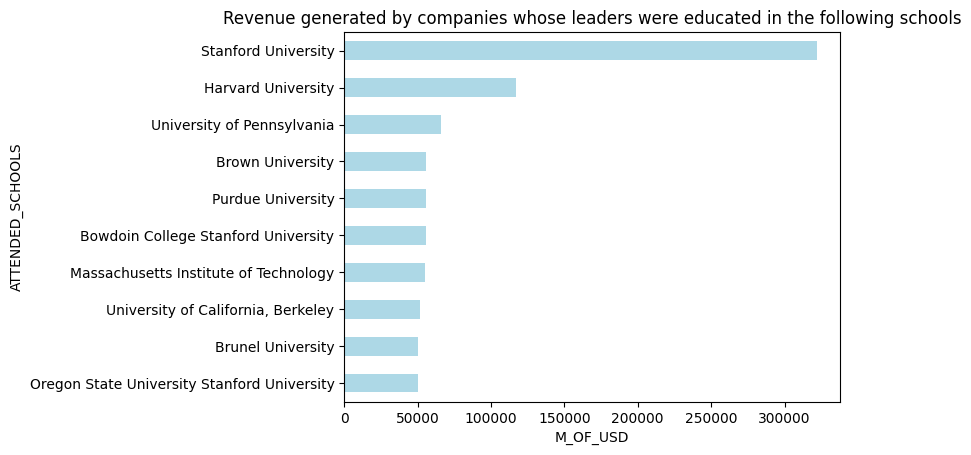

In [60]:
import matplotlib.pyplot as plt
import pandas as pd


# I will firstly remove the duplicate entries
df_employees_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="EMPLOYEE")
df_company_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="COMPANY")
df_employees = df_employees_dup.drop_duplicates()
df_comp = df_company_dup.drop_duplicates()


# Let's remove the companies created before 1980 for consistency purposes
founded_on = df_comp['FOUNDED_ON'].str[-4:]
df_comp = df_comp.drop(columns = ["FOUNDED_ON"])
df_comp.insert(3, "FOUNDED_ON", founded_on)
df_comp["FOUNDED_ON"] = pd.to_numeric(df_comp['FOUNDED_ON'], errors='coerce')
df_comp['FOUNDED_ON'].fillna(-1, inplace=True)
df_comp['FOUNDED_ON'] = df_comp['FOUNDED_ON'].astype(int)
condit = (df_comp["FOUNDED_ON"] >= 1980)
df_comp = df_comp[condit]
df_company = df_comp


# I will start with very similar steps to the ones in Question 1A)
cond = (df_employees["JOB_TITLES"].str.contains("CEO|Founder"))
df_empl_jobtitle = df_employees[cond]


# Now I remove the entries that do not have an school name indicated
df_empl_jobtitle_1 = df_empl_jobtitle.dropna(subset="ATTENDED_SCHOOLS")
df_empl_jobtitle_1 = df_empl_jobtitle_1.drop(columns=["EMPLOYEE_MD5", "JOB_TITLES"])


# Now I will cleanse the df_company dataset. For that, I will have to transform the REVENU_RANGE column into numerical values. This will require me to chose the value in the middle of the range, or an arbitrary value in the case of $10B+
df_comp_cleansed = df_company[["COMPANY_NAME", "REVENU_RANGE"]]
condit = (df_comp_cleansed["REVENU_RANGE"] != '—')
df_comp_cleansed = df_comp_cleansed[condit]
revenue_range_counts = df_comp_cleansed["REVENU_RANGE"].value_counts().to_dict()

list_midpoint_in_M_USD = [5.5, 30, 300, 75, 5500, 0.5, 750, 50000]
mapping_to_midpoint = {key: list_midpoint_in_M_USD[i] for i, key in enumerate(revenue_range_counts.keys())}
mapping_to_midpoint = pd.DataFrame(list(mapping_to_midpoint.items()), columns=["REVENU_RANGE", "MIDPOINT_IN_M_USD"])
mapping_to_midpoint_sorted = mapping_to_midpoint.sort_values(by="MIDPOINT_IN_M_USD", ascending=False)
print(mapping_to_midpoint_sorted)

df_comp_cl_midpoint = pd.merge(df_comp_cleansed, mapping_to_midpoint, how="right", on="REVENU_RANGE")
df_comp_cl_midpoint = df_comp_cl_midpoint.drop(columns=["REVENU_RANGE"])
df_comp_cl_midpoint.rename(columns={"MIDPOINT_IN_M_USD": "APPROXIMATE_REVENUE"}, inplace=True)
df_comp_cl_midpoint_sorted = df_comp_cl_midpoint.sort_values(by="APPROXIMATE_REVENUE", ascending=False)
print(df_comp_cl_midpoint_sorted)


# Now I can proceed to merge both datasets
df_empl_and_comp = pd.merge(df_comp_cl_midpoint, df_empl_jobtitle_1, how="right" , on="COMPANY_NAME")
df_empl_and_comp_sorted = df_empl_and_comp.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index().sort_values(by='APPROXIMATE_REVENUE', ascending=False)
df_empl_and_comp_sorted["ATTENDED_SCHOOLS"] = df_empl_and_comp_sorted["ATTENDED_SCHOOLS"].str.strip()


# As I have done in part A), I will try to find some of the top universities that are hidden in longer strings and add them back to the main dataset

word_to_count = "Berkeley"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_berk = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_berk_clean = df_empl_and_comp_sorted_berk[df_empl_and_comp_sorted_berk['ATTENDED_SCHOOLS'] != 'University of California, Berkeley']
df_empl_and_comp_sorted_berk_clean["ATTENDED_SCHOOLS"] = "University of California, Berkeley"
column_sum_berk_df = df_empl_and_comp_sorted_berk_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Stanford"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_st = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_st_clean = df_empl_and_comp_sorted_st[df_empl_and_comp_sorted_st['ATTENDED_SCHOOLS'] != 'Stanford University']
df_empl_and_comp_sorted_st_clean["ATTENDED_SCHOOLS"] = "Stanford University"
column_sum_st_df = df_empl_and_comp_sorted_st_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Harvard"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_h = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_h_clean = df_empl_and_comp_sorted_h[df_empl_and_comp_sorted_h['ATTENDED_SCHOOLS'] != 'Harvard University']
df_empl_and_comp_sorted_h_clean["ATTENDED_SCHOOLS"] = "Harvard University"
column_sum_h_df = df_empl_and_comp_sorted_h_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "MIT"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_mit = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_mit_clean = df_empl_and_comp_sorted_mit[df_empl_and_comp_sorted_mit['ATTENDED_SCHOOLS'] != 'Massachusetts Institute of Technology']
df_empl_and_comp_sorted_mit_clean["ATTENDED_SCHOOLS"] = "Massachusetts Institute of Technology"
column_sum_mit_df = df_empl_and_comp_sorted_mit_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Yale"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_y = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_y_clean = df_empl_and_comp_sorted_y[df_empl_and_comp_sorted_y['ATTENDED_SCHOOLS'] != 'Yale University']
df_empl_and_comp_sorted_y_clean["ATTENDED_SCHOOLS"] = "Yale University"
column_sum_y_df = df_empl_and_comp_sorted_y_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Pennsylvania"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_p = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_p_clean = df_empl_and_comp_sorted_p[df_empl_and_comp_sorted_p['ATTENDED_SCHOOLS'] != 'University of Pennsylvania']
df_empl_and_comp_sorted_p_clean["ATTENDED_SCHOOLS"] = "University of Pennsylvania"
column_sum_p_df = df_empl_and_comp_sorted_p_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)


# I will do the same for Columbia, Duke and Brown, given that they scored very highly on the first classification

word_to_count = "Columbia"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_col = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_col_clean = df_empl_and_comp_sorted_col[df_empl_and_comp_sorted_col['ATTENDED_SCHOOLS'] != 'Columbia University']
df_empl_and_comp_sorted_col_clean["ATTENDED_SCHOOLS"] = "Columbia University"
column_sum_col_df = df_empl_and_comp_sorted_col_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Brown"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_brown = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_brown_clean = df_empl_and_comp_sorted_brown[df_empl_and_comp_sorted_brown['ATTENDED_SCHOOLS'] != 'Brown University']
df_empl_and_comp_sorted_brown_clean["ATTENDED_SCHOOLS"] = "Brown University"
column_sum_brown_df = df_empl_and_comp_sorted_brown_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)

word_to_count = "Duke"
df_empl_and_comp_sorted['COUNTED_UNI'] = df_empl_and_comp_sorted['ATTENDED_SCHOOLS'].str.count(word_to_count)
df_empl_and_comp_sorted_duk = df_empl_and_comp_sorted[df_empl_and_comp_sorted["COUNTED_UNI"] >= 1]
df_empl_and_comp_sorted_duk_clean = df_empl_and_comp_sorted_duk[df_empl_and_comp_sorted_duk['ATTENDED_SCHOOLS'] != 'Duke University']
df_empl_and_comp_sorted_duk_clean["ATTENDED_SCHOOLS"] = "Duke University"
column_sum_duk_df = df_empl_and_comp_sorted_duk_clean.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index(name="APPROXIMATE_REVENUE")
df_empl_and_comp_sorted.drop(columns={"COUNTED_UNI"}, inplace=True)


# Now I append the new revenues to the main list
final_df = pd.concat([df_empl_and_comp_sorted, column_sum_duk_df, column_sum_brown_df, column_sum_col_df, column_sum_y_df, column_sum_mit_df, column_sum_p_df, column_sum_h_df, column_sum_st_df, column_sum_berk_df], ignore_index=True)
final_df.sort_values(by="APPROXIMATE_REVENUE", ascending=False, inplace=True)
final_df_gp = final_df.groupby("ATTENDED_SCHOOLS")["APPROXIMATE_REVENUE"].sum().reset_index().sort_values(by='APPROXIMATE_REVENUE', ascending=False)


# I will remove Wharton School of the University of Pennsylvania, given that it is already included in University of Pennsylvania
final_df_gp = final_df_gp[final_df_gp["ATTENDED_SCHOOLS"] != "Wharton School of the University of Pennsylvania"]


# Now I select the top 10 and plot them
top_10_universities_per_revenue = final_df_gp.nlargest(10, "APPROXIMATE_REVENUE")
print(top_10_universities_per_revenue)

custom_colors = ['lightblue']
top_10_universities_per_revenue.set_index("ATTENDED_SCHOOLS")['APPROXIMATE_REVENUE'].sort_values().plot.barh(color=custom_colors)
plt.xlabel('M_OF_USD')
plt.title('Revenue generated by companies whose leaders were educated in the following schools')



**INTERPRETATION**: We can see that the founders that studied at Stanford, Harvard and the University of Pennsylvania generated companies with larger revenues.

## **QUESTION 2**: Which sectors are the most successful ones?

### **A)** By number of companies.

Let's firstly measure success by counting how many companies we can find per each of the categories provided in the dataset.

            MAIN_CATEGORIES  CATEGORY_COUNT PERCENTAGE_CATEGORY
0                  Software             297                6.3%
1                      SaaS             148                3.1%
2                   FinTech             144                3.0%
3    Information Technology             126                2.7%
4        Financial Services             124                2.6%
5                  Internet             116                2.5%
6       Enterprise Software             100                2.1%
7                    Mobile              80                1.7%
8                 Analytics              67                1.4%
9                E-Commerce              67                1.4%
10                  Finance              66                1.4%
11  Artificial Intelligence              59                1.2%
12              Health Care              58                1.2%
13                 Payments              57                1.2%
14         Machine Learning             

Text(0.5, 1.0, '15 Most prevalent sectors - based on firms created in 1980 or after')

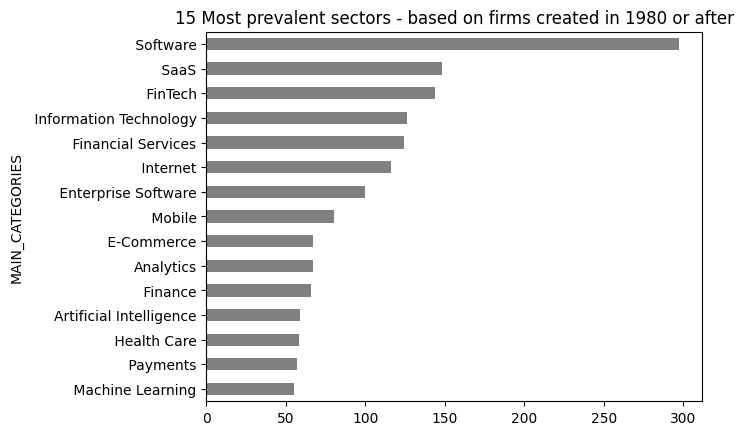

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

df_company_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="COMPANY")
df_comp = df_company_dup.drop_duplicates()

# Let's remove the companies created before 1980 for consistency purposes
founded_on = df_comp['FOUNDED_ON'].str[-4:]
df_comp = df_comp.drop(columns = ["FOUNDED_ON"])
df_comp.insert(3, "FOUNDED_ON", founded_on)
df_comp["FOUNDED_ON"] = pd.to_numeric(df_comp['FOUNDED_ON'], errors='coerce')
df_comp['FOUNDED_ON'].fillna(-1, inplace=True)
df_comp['FOUNDED_ON'] = df_comp['FOUNDED_ON'].astype(int)
condit = (df_comp["FOUNDED_ON"] >= 1980)
df_comp = df_comp[condit]
df_company = df_comp


# Let's get some information about the revenue column
df_comp_revrange_desc_1 = df_company["REVENU_RANGE"].value_counts()


# Let's split the category column and count how many times each of the categories shows up in the dataset
df_company_rev_ind = df_company.loc[:, ["REVENU_RANGE", "CATEGORY"]]
df_company_rev_ind_1 = df_company_rev_ind['CATEGORY'].str.split(',').explode()
df_cri = df_company_rev_ind_1.value_counts().to_frame()
df_cri1 = df_cri.reset_index().rename(columns={"index": "MAIN_CATEGORIES", "CATEGORY": "CATEGORY_COUNT"})


# Now let's see the counting column in percentage terms
new_col = df_cri1["CATEGORY_COUNT"] / df_cri1["CATEGORY_COUNT"].sum()
new_col_formatted = new_col.apply(lambda x: f"{x * 100:.1f}%").to_frame().rename(columns={"CATEGORY_COUNT": "PERCENTAGE_CATEGORY"})
df_cri1["PERCENTAGE_CATEGORY"] = new_col_formatted


# Let's now select the top 15 categories
top_15_cat = df_cri1.nlargest(15, 'CATEGORY_COUNT')
print(top_15_cat)


# Now let's present that in a graph
df_cri3 = top_15_cat.drop(columns="PERCENTAGE_CATEGORY")
color_range = ["grey"]
df_cri3.set_index("MAIN_CATEGORIES")['CATEGORY_COUNT'].sort_values().plot.barh(color=color_range)
plt.title('15 Most prevalent sectors - based on firms created in 1980 or after')



**INTERPRETATION**: We can see that the sectors Software, SaaS and FinTech are the ones that show up more often in our dataset.


### **B)**: By revenue.

Let's now try to measure success by giving each revenue range a nominal value and then adding up all of those estimated revenues by sector.


     REVENU_RANGE  MIDPOINT_IN_M_USD
7           $10B+            50000.0
4   Less than $1M             5500.0
6    $500M to $1B              750.0
2  $100M to $500M              300.0
3   $50M to $100M               75.0
1    $10M to $50M               30.0
0     $1M to $10M                5.5
5     $1B to $10B                0.5
                    CATEGORY  APPROXIMATE_REVENUE
402                 Software             348198.0
241                 Internet             336928.5
282                   Mobile             240821.5
232   Information Technology             211806.5
35                   Banking             209011.0
177       Financial Services             207098.0
159      Enterprise Software             178658.0
136               E-Commerce             156382.5
444          Video Streaming             150932.0
175                  Finance             141275.5
284              Mobile Apps             132109.0
23   Artificial Intelligence             119315.5
396             S

Text(0.5, 1.0, 'Most revenue-generating sectors')

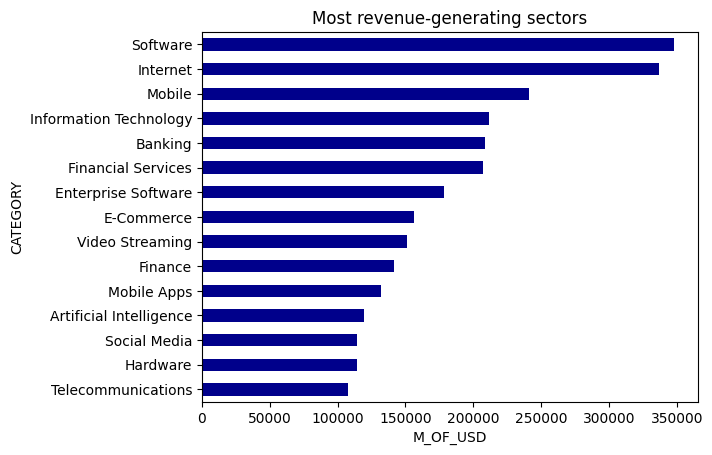

In [62]:
# I can start by reusing a part of the code used in Question 1B) but replacing the COMPANY_NAME column by the CATEGORY one

import pandas as pd

df_company_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="COMPANY")
df_comp = df_company_dup.drop_duplicates()


# Let's remove the companies created before 1980 for consistency purposes
founded_on = df_comp['FOUNDED_ON'].str[-4:]
df_comp = df_comp.drop(columns = ["FOUNDED_ON"])
df_comp.insert(3, "FOUNDED_ON", founded_on)
df_comp["FOUNDED_ON"] = pd.to_numeric(df_comp['FOUNDED_ON'], errors='coerce')
df_comp['FOUNDED_ON'].fillna(-1, inplace=True)
df_comp['FOUNDED_ON'] = df_comp['FOUNDED_ON'].astype(int)
condit = (df_comp["FOUNDED_ON"] >= 1980)
df_comp = df_comp[condit]
df_company = df_comp


df_comp_cleansed = df_company[["CATEGORY", "REVENU_RANGE"]]
condit = (df_comp_cleansed["REVENU_RANGE"] != '—')
df_comp_cleansed = df_comp_cleansed[condit]
revenue_range_counts = df_comp_cleansed["REVENU_RANGE"].value_counts().to_dict()
list_midpoint_in_M_USD = [5.5, 30, 300, 75, 5500, 0.5, 750, 50000]
mapping_to_midpoint = {key: list_midpoint_in_M_USD[i] for i, key in enumerate(revenue_range_counts.keys())}
mapping_to_midpoint = pd.DataFrame(list(mapping_to_midpoint.items()), columns=["REVENU_RANGE", "MIDPOINT_IN_M_USD"])
mapping_to_midpoint_sort = mapping_to_midpoint.sort_values(by="MIDPOINT_IN_M_USD", ascending=False)
print(mapping_to_midpoint_sort)

df_comp_cl_midpoint = pd.merge(df_comp_cleansed, mapping_to_midpoint, how="right", on="REVENU_RANGE")
df_comp_cl_midpoint = df_comp_cl_midpoint.drop(columns=["REVENU_RANGE"])
df_comp_cl_midpoint.rename(columns={"MIDPOINT_IN_M_USD": "APPROXIMATE_REVENUE"}, inplace=True)


# Now let's take some code from the Question 2A) in order to split the category column
df_company_rev_ind_1 = (
    df_comp_cl_midpoint['CATEGORY']
    .str.split(', ')
    .explode()
    .to_frame(name='CATEGORY')
    .assign(APPROXIMATE_REVENUE=df_comp_cl_midpoint['APPROXIMATE_REVENUE'].repeat(df_comp_cl_midpoint['CATEGORY'].str.count(', ') + 1))
)

df_comp_cat_by_revenue = df_company_rev_ind_1.groupby("CATEGORY")["APPROXIMATE_REVENUE"].sum().reset_index().sort_values("APPROXIMATE_REVENUE", ascending=False)
top15_by_revenue = df_comp_cat_by_revenue.nlargest(15, 'APPROXIMATE_REVENUE').sort_values(by='APPROXIMATE_REVENUE', ascending=False)
print(top15_by_revenue)

df_categories_top15 = df_comp_cat_by_revenue.head(15).sort_values(by='APPROXIMATE_REVENUE', ascending=False)
color_range = ["darkblue"]
df_categories_top15.set_index("CATEGORY")['APPROXIMATE_REVENUE'].sort_values().plot.barh(color=color_range)
plt.xlabel('M_OF_USD')
plt.title('Most revenue-generating sectors')



**INTERPRETATION**: We can see that the sectors Internet, Software and Mobile are the most successful ones by this method. Fintech and SaaS are nowhere to be seen in this occasion.

## **QUESTION 3**: For how long should I expect to stay private?

### By category.

                   CATEGORY  YEARS_BEFORE_EXIT  COUNT_CATEGORY
6                   Banking               12.5             8.0
36                   Retail               11.9            14.0
21                 Hardware               11.7            12.0
16                  Fashion               11.6             7.0
27              Marketplace               11.5            12.0
18                  Finance               11.1            24.0
3   Artificial Intelligence               11.0             7.0
35              Real Estate               11.0             6.0
12           Cyber Security               10.7             7.0
23   Information Technology               10.7            35.0
37                     SaaS               10.7            46.0
25            Manufacturing               10.5            11.0
1                 Analytics               10.4            18.0
19       Financial Services               10.4            30.0
15      Enterprise Software               10.3         

<ipython-input-73-2e547a217831>:49: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_years_by_category = (df_expanded.groupby('CATEGORY').mean().reset_index())


Text(0.5, 1.0, 'Time spent private - top sectors')

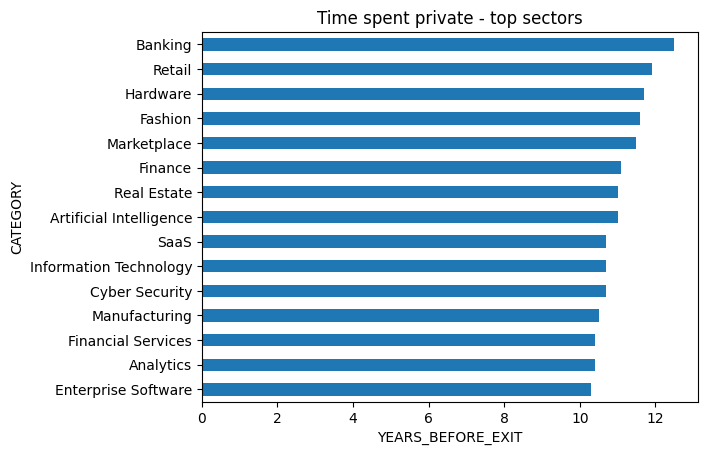

In [73]:
import matplotlib.pyplot as plt


# Firstly, I remove the duplicates
df_company_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="COMPANY")
df_company = df_company_dup.drop_duplicates()

public_companies = df_company[~df_company['EXITED_ON'].str.contains("—")]
exited_on = public_companies['EXITED_ON'].str[-4:]
founded_on = public_companies['FOUNDED_ON'].str[-4:]

public_companies = public_companies.drop(columns = ["FOUNDED_ON", "EXITED_ON", "COMPANY_NAME", "CLOSED_ON", "EMPLOYEE_NUMBER"])

public_companies.insert(3, "FOUNDED_ON", founded_on)
public_companies.insert(4, "EXITED_ON", exited_on)
public_companies['FOUNDED_ON'] = public_companies['FOUNDED_ON'].astype(int)
public_companies['EXITED_ON'] = public_companies['EXITED_ON'].astype(int)

public_companies["YEARS_BEFORE_EXIT"] = public_companies["EXITED_ON"] - public_companies["FOUNDED_ON"]
public_companies['YEARS_BEFORE_EXIT'] = pd.to_numeric(public_companies['YEARS_BEFORE_EXIT'], errors='coerce')


# Let's now remove very old companies, for instance the ones created before 1980
condit = (public_companies["FOUNDED_ON"] > 1980)
public_companies = public_companies[condit]


# I notice that the dataset has some problems. Namely, the column YEARS_BEFORE_EXIT is negative, which should not be the case. I will remove those entries
con = (public_companies["YEARS_BEFORE_EXIT"] > 0)
public_companies = public_companies[con]


# Let's now split the CATEGORY column and expand it
df_expanded = public_companies.assign(CATEGORY=public_companies['CATEGORY'].str.split(',')).explode('CATEGORY')
df_expanded['CATEGORY'] = df_expanded['CATEGORY'].str.strip()
df_expanded = df_expanded.reset_index(drop=True)


# I will count how many instances we have of each of the items in CATEGORY to make sure that the upcoming averages are representative
df_expanded["COUNT_CATEGORY"] = df_expanded.groupby('CATEGORY')['YEARS_BEFORE_EXIT'].transform('count')


# There are many categories with very few appearances. I will get rid of them given that they are not representative. I chose the arbitrary value of 5 to proceed
condition = (df_expanded["COUNT_CATEGORY"] > 5)
df_expanded = df_expanded[condition]


# Now I can proceed to do the mean of the time that the remaining companies spent private
average_years_by_category = (df_expanded.groupby('CATEGORY').mean().reset_index())
average_years_by_category.drop(columns=["FOUNDED_ON", "EXITED_ON"], inplace=True)
average_years_by_category["YEARS_BEFORE_EXIT"] = average_years_by_category["YEARS_BEFORE_EXIT"].astype(float).round(1)

top10_category_sorted = average_years_by_category.nlargest(15, 'YEARS_BEFORE_EXIT').sort_values(by='YEARS_BEFORE_EXIT', ascending=False)
print(top10_category_sorted)

top10_category_sorted.set_index("CATEGORY")['YEARS_BEFORE_EXIT'].sort_values().plot.barh()
plt.xlabel('YEARS_BEFORE_EXIT')
plt.title('Time spent private - top sectors')



**INTERPRETATION**: We can that companies in the banking, retail and hardware sectors were the ones that spent the longest time private (on average).

## **QUESTION 4**: What country is more suited for creating a startup?

### By acquisition price.

               COUNTRY  GDP_PER_CAPITA  AV_ACQUISITION_PR_IN_M_USD
0                Japan    33815.317273                11044.715447
1          Switzerland    92101.469741                 3756.875000
2       United Kingdom    45850.426122                 3070.998523
3               France    40963.837337                 2439.246809
4                China    12720.215640                 1350.079148
5               Sweden    55873.220811                 1300.241683
6        United States    76398.591742                  854.059796
7              Germany    48432.455873                  591.115087
8               Canada    54966.488836                  293.100896
9              Bahrain    30152.034684                  257.708009
10           Singapore    82807.649083                  200.000000
11               India     2388.621198                  185.914810
12           Australia    64491.429886                  182.700000
13             Belgium    49582.825365                  106.38

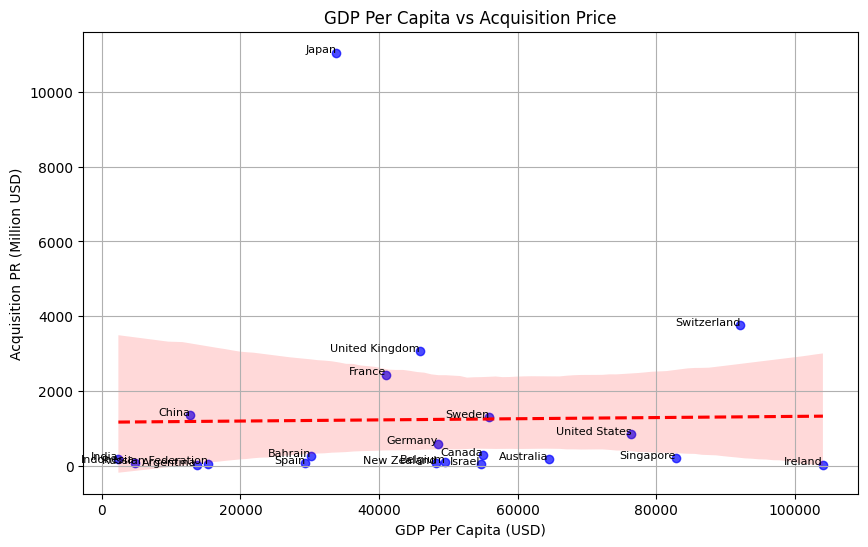

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_company_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="COMPANY")
df_comp = df_company_dup.drop_duplicates()
df_acq_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="ACQUISITION")
df_acq = df_acq_dup.drop_duplicates()


# Let's remove the companies created before 1980 for consistency purposes
founded_on = df_comp['FOUNDED_ON'].str[-4:]
df_comp = df_comp.drop(columns = ["FOUNDED_ON"])
df_comp.insert(3, "FOUNDED_ON", founded_on)
df_comp["FOUNDED_ON"] = pd.to_numeric(df_comp['FOUNDED_ON'], errors='coerce')
df_comp['FOUNDED_ON'].fillna(-1, inplace=True)
df_comp['FOUNDED_ON'] = df_comp['FOUNDED_ON'].astype(int)
condit = (df_comp["FOUNDED_ON"] >= 1980)
df_comp = df_comp[condit]


# Now I cleanse the PRICE column. Amongst others, I will convert all the currencies to USD. This point has been more developed in Question 5
cond = (df_acq["PRICE"] != "—")
df_acq = df_acq[cond]

df_currencies = df_acq['PRICE'].str.extract('([^\d]+)')
df_currencies_nparray = df_currencies.squeeze().unique()
df_acq["CURRENCY"] = df_currencies

df_er = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Exchange_Rates_Table.csv")
df_exchange_rates = df_er[["LOCATION", "Country", "Frequency", "TIME", "Value"]]
cond_1 = (df_exchange_rates["Frequency"] == "Monthly")
cond_2 = (df_exchange_rates["TIME"] == "2022-12")
combined_condition = cond_1 & cond_2
df_ex_rates = df_exchange_rates[combined_condition]
mapping = {"€": "EA19", "¥": "JPN", "₹": "IND", "£": "GBR", "CA$": "CAN", "A$": "AUS", "CN¥": "CHN", "R$": "BRA", "ZAR": "ZAF", "SGD": "", "₩": "KOR", "CHF": "CHE", "MYR": "",
 'SEK': "SWE", 'RUB': "RUS"}
df_mapping = pd.DataFrame.from_dict(mapping, orient='index', columns=['Country Abbreviation'])
df_mapping.reset_index(inplace=True)
df_mapping.columns = ["CURRENCY", "LOCATION"]


# As you can see, we are missing the exchange rates for Singapore and Malaysia in our OECD file. I proceed to add them manually after adding the CURRENCY column
df_ex_rates = df_ex_rates[["LOCATION", "Value"]]
float_columns = df_ex_rates.select_dtypes(include=['float'])
df_ex_rates[float_columns.columns] = float_columns.round(2)
final_mapping = pd.merge(df_mapping, df_ex_rates, how="left", on="LOCATION")

final_mapping = final_mapping.rename(columns={"Value": "EXCHANGE_RATE_TO_USD"})
final_mapping = final_mapping[["CURRENCY", "EXCHANGE_RATE_TO_USD"]]
dollar_mapping = ["$", 1]
final_mapping.loc[len(final_mapping)] = dollar_mapping

curr_and_acq_df = pd.merge(df_acq, final_mapping, how="left", on="CURRENCY")

def convert_money(row):
    currency = row['CURRENCY']
    value = row['PRICE'].replace(currency, '').replace(",", "")
    return float(value) / row['EXCHANGE_RATE_TO_USD']

curr_and_acq_df["PRICE_IN_USD"] = curr_and_acq_df.apply(convert_money, axis=1)
curr_and_acq_df["AV_ACQUISITION_PR_IN_M_USD"] = curr_and_acq_df["PRICE_IN_USD"] / 1000000
curr_and_acq_df["ORIGINAL_CURRENCY"] = curr_and_acq_df["CURRENCY"]
curr_and_acq_df

curr_and_acq_df = curr_and_acq_df.drop(columns=["EXCHANGE_RATE_TO_USD","PRICE", "PRICE_IN_USD", "ANNOUNCED_DATE", "CURRENCY", "ANNOUNCED_DATE", "ACQUIREE_NAME"])
curr_and_acq_df


# Let's now go back to the COMPANY tab and just grab the country and company name information. Note that in this case, we take the companies founded before the year 1980 into account, because we want to use the COMPANY_NAME column for mapping purposes
df_comp_1 = df_comp['LOCATION'].str.split(',').str.get(-1).to_frame()
df_comp["COUNTRY"] = df_comp_1
df_company_cleansed = df_comp[["COUNTRY", "COMPANY_NAME"]]
df_company_cleansed


# Let's now merge this table with the COMPANY tab
company_and_acquisition = pd.merge(df_company_cleansed, curr_and_acq_df, how="right", on="COMPANY_NAME")
company_and_acquisition_acq_2 = company_and_acquisition.groupby("COUNTRY")["AV_ACQUISITION_PR_IN_M_USD"].mean().reset_index().sort_values("AV_ACQUISITION_PR_IN_M_USD", ascending=False)


# Let's try to measure the relationship between acquisition prices and the wealth of a country. For that, I will import GDP Per Capita data of different countries from the OECD website
country_gdp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GDP Per Capita All Countries.csv", skiprows=4)
country_gdp = country_gdp[["Country Name", "Indicator Name", "2022", "2021"]]
country_gdp["GDP_PER_CAPITA"] = np.where(country_gdp['2022'].isna(), country_gdp['2021'], country_gdp['2022'])
country_gdp.drop(columns={"Indicator Name", "2022", "2021"}, inplace=True)
country_gdp.rename(columns={"Country Name": "COUNTRY"}, inplace=True)

country_gdp["COUNTRY"] = country_gdp["COUNTRY"].str.strip()
company_and_acquisition_acq_2["COUNTRY"] = company_and_acquisition_acq_2["COUNTRY"].str.strip()


# Let's first check if all of the items in the country columns match by merging the GDP data with the groupped acquisition value by country from our dataset
comp_acq_and_gdp = pd.merge(country_gdp, company_and_acquisition_acq_2, on="COUNTRY", how="right")

print(comp_acq_and_gdp)


# Scatter plot with country names
plt.figure(figsize=(10, 6))
plt.scatter(comp_acq_and_gdp['GDP_PER_CAPITA'], comp_acq_and_gdp['AV_ACQUISITION_PR_IN_M_USD'], color='blue', alpha=0.7)

# Add country names to the points
for i, country in enumerate(comp_acq_and_gdp['COUNTRY']):
    plt.text(comp_acq_and_gdp['GDP_PER_CAPITA'][i], comp_acq_and_gdp['AV_ACQUISITION_PR_IN_M_USD'][i], country, fontsize=8, ha='right')

# Regression line
sns.regplot(x='GDP_PER_CAPITA', y='AV_ACQUISITION_PR_IN_M_USD', data=comp_acq_and_gdp, scatter=False, color='red', line_kws={'linestyle':'--'})

plt.title('GDP Per Capita vs Acquisition Price')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Acquisition PR (Million USD)')
plt.grid(True)
plt.show()



**INTERPRETATION**: The countries where average acquisition price was the highest were Japan, the UK and Switzerland.
There is no relationship between the wealth of a nation and the acquisition price paid.

## **QUESTION 5**: How much financing am I expected to obtain?

### **A)**: By funding type
### **C)**: In the Top 3 locations, groupped by funding type
### **D)**: Does the wealth of the country affect the amount of financing given?

Axes(0.125,0.11;0.775x0.77)
          LOCATION  MONEY_RAISED_IN_M_USD
40   United States          141577.762950
6            China           62911.094487
14           India           25465.797158
39  United Kingdom           10016.640777
15       Indonesia            6512.700000
12         Germany            4439.691064
4           Canada            3847.900619
30     South Korea            2300.000000
13       Hong Kong            2146.500000
3           Brazil            1942.935000
32          Sweden            1672.407821
27       Singapore            1617.582015
17          Israel            1133.400000
10         Finland            1020.671809
31           Spain            1003.297872
None
         LOCATION    FUNDING_TYPE  COUNTS_FUNDING_TYPE
0           China  Private Equity                    9
7           China        Series F                    2
8           China        Series G                    1
11  United States  Private Equity                   56
18  United States   

<ipython-input-74-ba561009d328>:226: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df_world_1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


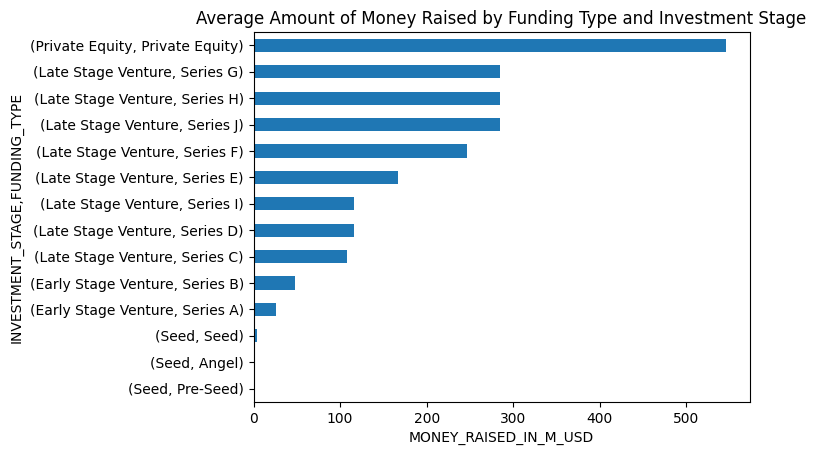

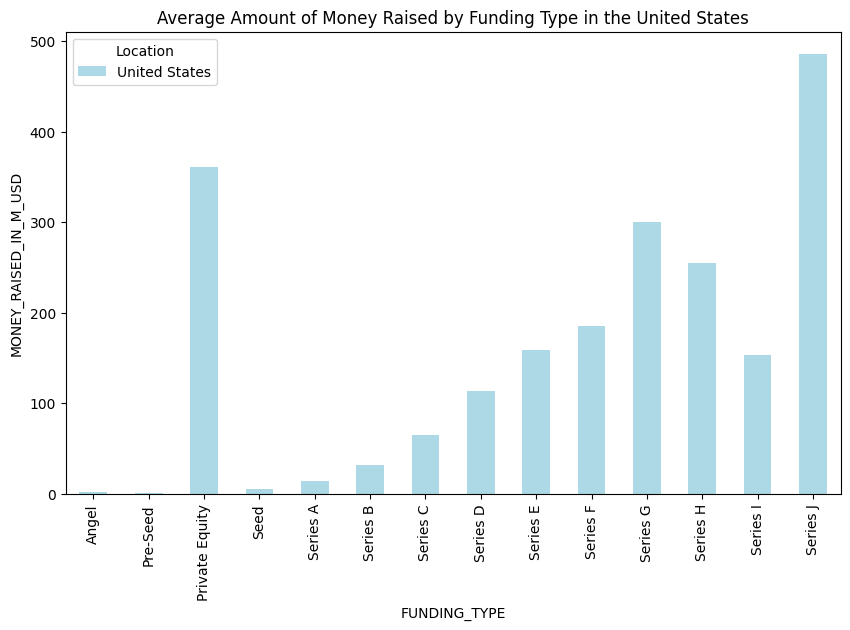

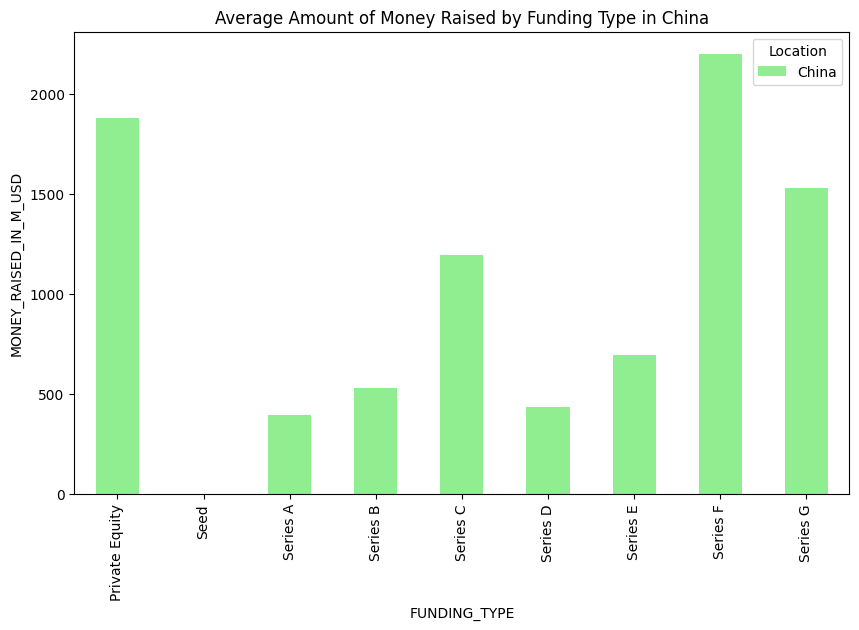

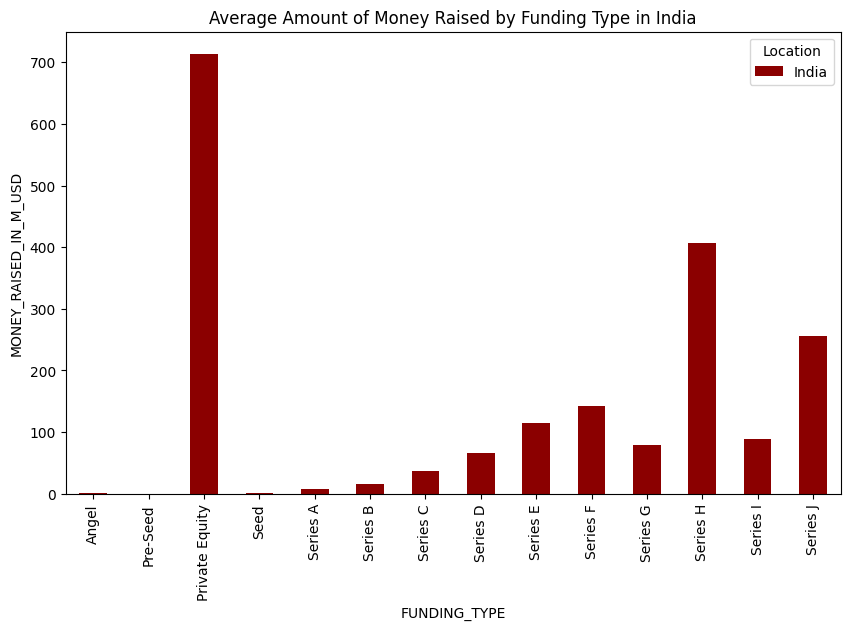

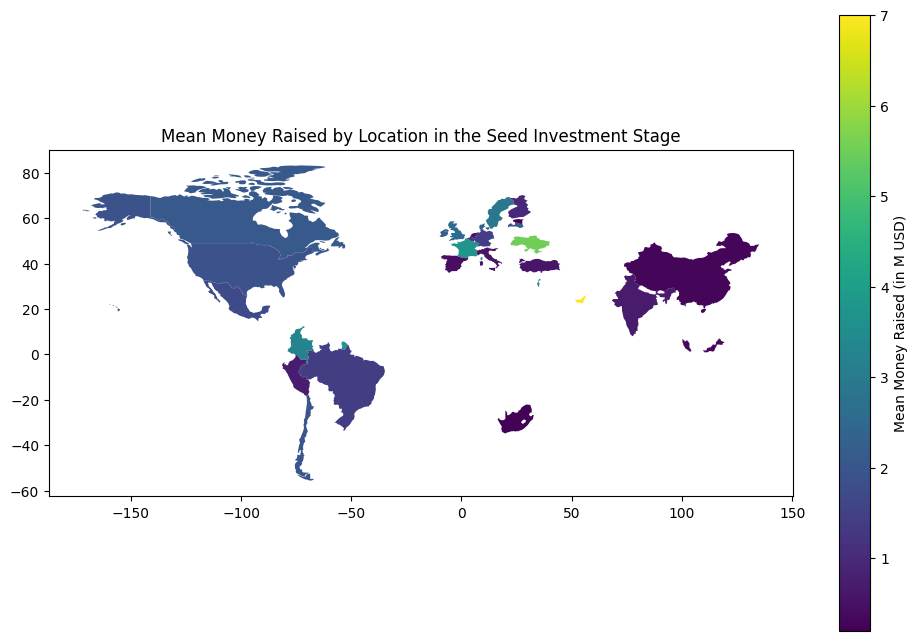

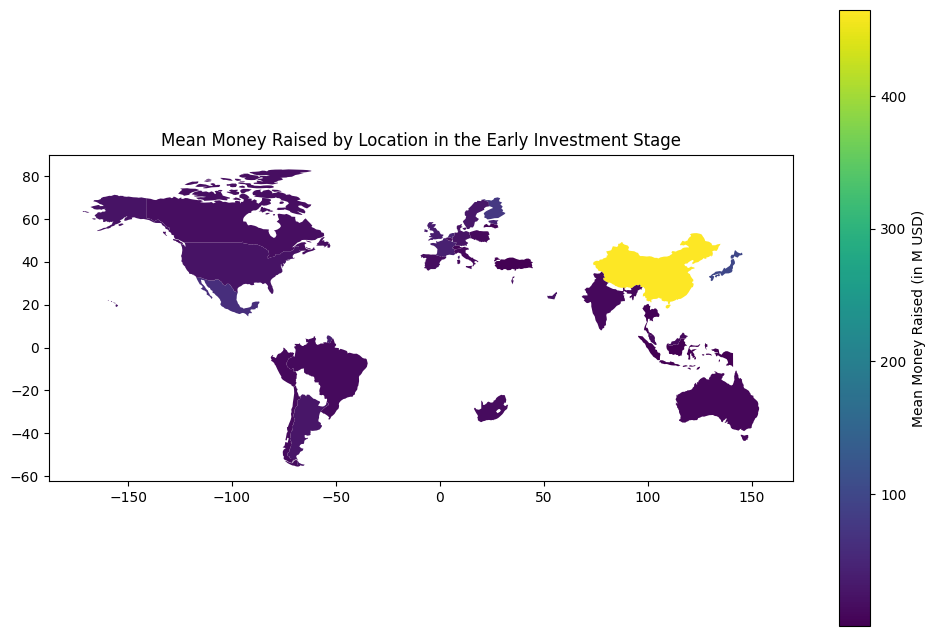

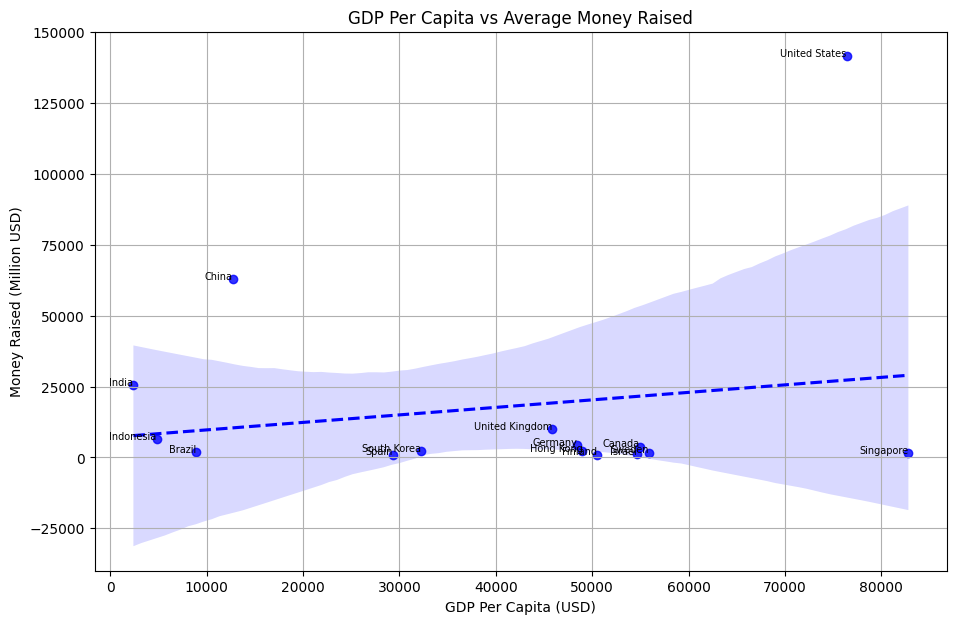

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

df_investment_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="INVESTMENT")


# I will firstly check if there are any identical rows in the dataset and proceed to remove them
df_investment = df_investment_dup.drop_duplicates()


# Now I would like to find out the types of FUNDING_TYPE that we have, and how they relate to the INVESTMENT_STAGE.
df_funding_types = df_investment[["FUNDING_TYPE", "INVESTMENT_STAGE"]]
df_funding_types = df_funding_types.copy()
df_funding_types.loc[:, "MERGED"] = df_funding_types["FUNDING_TYPE"] + " - " + df_funding_types["INVESTMENT_STAGE"]
df_funding_types_uniques = sorted(df_funding_types["MERGED"].unique())
df_uniques = pd.DataFrame({"MGERGED_INVESTMENT_TYPES": df_funding_types_uniques})


# We see that there are many types of FUNDING_TYPES and that the INVESTMENT_STAGE columns groups those types into overarching stages. I deem the later column to be more informative, and will thus group the investment rounds accordingly

# We also need to find out the different currencies that we have in our dataset. For that, I extract the first non-numbers of the the MONEY_RAISED column and create an array with the unique items

df_currencies = df_investment['MONEY_RAISED'].str.extract('([^\d]+)')
df_currencies_nparray = df_currencies.squeeze().unique()


# Now I will convert the values of the different currencies to USD. For that, I will download a table with the exchange rates at the end of the year 2022
# source: https://stats.oecd.org/index.aspx?queryid=169

df_er = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Exchange_Rates_Table.csv")
df_exchange_rates = df_er[["LOCATION", "Country", "Frequency", "TIME", "Value"]]
cond_1 = (df_exchange_rates["Frequency"] == "Monthly")
cond_2 = (df_exchange_rates["TIME"] == "2022-12")
combined_condition = cond_1 & cond_2
df_ex_rates = df_exchange_rates[combined_condition]


# Now that I have a list of the exchange rate of many different currencies to USD, I need to find the 15 currencies (without counting the USD) that correspond to the ones in my dataset and map them properly
# I will firstly create a mapping table separately. For that, I will first copy the list of currencies from our dataset, and then manually find the corresponding item in the LOCATION column
mapping = {"€": "EA19", "¥": "JPN", "₹": "IND", "£": "GBR", "CA$": "CAN", "A$": "AUS", "CN¥": "CHN", "R$": "BRA", "ZAR": "ZAF", "SGD": "", "₩": "KOR", "CHF": "CHE", "MYR": "",
 'SEK': "SWE", 'RUB': "RUS"}
df_mapping = pd.DataFrame.from_dict(mapping, orient='index', columns=['Country Abbreviation'])
df_mapping.reset_index(inplace=True)
df_mapping.columns = ["CURRENCY", "LOCATION"]

df_ex_rates = df_ex_rates[["LOCATION", "Value"]]
float_columns = df_ex_rates.select_dtypes(include=['float'])
df_ex_rates[float_columns.columns] = float_columns.round(2)
final_mapping = pd.merge(df_mapping, df_ex_rates, how="left", on="LOCATION")


# As you can see, we are missing the exchange rates for Singapore and Malaysia in our OECD file. I proceed to add them manually after adding the CURRENCY column. On https://www.exchange-rates.org/exchange-rate-history/, I found that the value of the MYR was 4.405 and the one for the SGD was 1.3406 at the end of 2022
final_mapping.loc[final_mapping["CURRENCY"] == "MYR", 'Value'] = 4.41
final_mapping.loc[final_mapping["CURRENCY"] == "SGD", 'Value'] = 1.34


# Now I will cleanse the dataset a little bit
final_mapping = final_mapping.rename(columns={"Value": "EXCHANGE_RATE_TO_USD"})
final_mapping = final_mapping[["CURRENCY", "EXCHANGE_RATE_TO_USD"]]
dollar_mapping = ["$", 1]
final_mapping.loc[len(final_mapping)] = dollar_mapping


# Now that I have a clean exchange rates mapping table, I can proceed to the calculations in our investment table
df_investment["CURRENCY"] = df_currencies
cond = (df_investment["MONEY_RAISED"] != "—")
df_investment = df_investment[cond]
curr_and_inv_df = pd.merge(df_investment, final_mapping, how="left", on="CURRENCY")

def convert_money(row):
    currency = row['CURRENCY']
    value = row['MONEY_RAISED'].replace(currency, '').replace(",", "")
    return float(value) / row['EXCHANGE_RATE_TO_USD']

curr_and_inv_df["MONEY_RAISED_IN_USD"] = curr_and_inv_df.apply(convert_money, axis=1)
curr_and_inv_df["MONEY_RAISED_IN_M_USD"] = curr_and_inv_df["MONEY_RAISED_IN_USD"] / 1000000
curr_and_inv_df["ORIGINAL_CURRENCY"] = curr_and_inv_df["CURRENCY"]
condit = (curr_and_inv_df["INVESTMENT_STAGE"] != "—")
curr_and_inv_df = curr_and_inv_df[condit]

curr_and_inv_df = curr_and_inv_df.drop(columns=["EXCHANGE_RATE_TO_USD", "CURRENCY", "ANNOUNCED_DATE", "MONEY_RAISED_IN_USD"])
curr_and_inv_investment_sort = curr_and_inv_df.groupby(["INVESTMENT_STAGE", "FUNDING_TYPE"])["MONEY_RAISED_IN_M_USD"].sum().sort_index(level="INVESTMENT_STAGE")
curr_and_inv_value_sort = curr_and_inv_df.groupby(["INVESTMENT_STAGE", "FUNDING_TYPE"])["MONEY_RAISED_IN_M_USD"].sum().sort_values()


# Now we have a general overview of how much money was given by each of the financing rounds overall. Let's have a look at the average per round, which will be more informative
curr_and_inv_average_per_round = curr_and_inv_df.groupby(["INVESTMENT_STAGE", "FUNDING_TYPE"])["MONEY_RAISED_IN_M_USD"].mean().sort_index(level="INVESTMENT_STAGE")
print(curr_and_inv_average_per_round.sort_values().plot.barh())
plt.xlabel('MONEY_RAISED_IN_M_USD')
plt.title('Average Amount of Money Raised by Funding Type and Investment Stage')


# Let's now do this by location
df_company_dup = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2324MBD41_Project_Dataset-v01.xlsx", sheet_name="COMPANY")
df_comp = df_company_dup.drop_duplicates()


# Let's remove the companies created before 1980 for consistency purposes
founded_on = df_comp['FOUNDED_ON'].str[-4:]
df_comp = df_comp.drop(columns = ["FOUNDED_ON"])
df_comp.insert(3, "FOUNDED_ON", founded_on)
df_comp["FOUNDED_ON"] = pd.to_numeric(df_comp['FOUNDED_ON'], errors='coerce')
df_comp['FOUNDED_ON'].fillna(-1, inplace=True)
df_comp['FOUNDED_ON'] = df_comp['FOUNDED_ON'].astype(int)
condit = (df_comp["FOUNDED_ON"] >= 1980)
df_comp = df_comp[condit]


company_and_investment = pd.merge(df_comp, curr_and_inv_df, how="right", on="COMPANY_NAME")
company_and_investment["LOCATION"] = company_and_investment["LOCATION"].str.split(", ").str[-1]
money_raised_by_location = company_and_investment.groupby("LOCATION")["MONEY_RAISED_IN_M_USD"].sum().reset_index().sort_values(by="MONEY_RAISED_IN_M_USD")

top_countries_money_raised = money_raised_by_location.nlargest(15, 'MONEY_RAISED_IN_M_USD').sort_values(by='MONEY_RAISED_IN_M_USD', ascending=False)
print(top_countries_money_raised)


# This list is not very informative. Let's to it by funding type and by location. The selected locations are the three countries that were on top in the previous dataset (i.e: the US, China and India)

# Firstly, I do the USA
cond_usa = (company_and_investment["LOCATION"] == "United States")
company_and_investment_usa = company_and_investment[cond_usa]
company_and_investment_usa = company_and_investment_usa[["LOCATION", "MONEY_RAISED_IN_M_USD", "FUNDING_TYPE"]]
usa_grouped = company_and_investment_usa.groupby(["LOCATION", "FUNDING_TYPE"])["MONEY_RAISED_IN_M_USD"].mean().reset_index()

ax = usa_grouped.pivot(index='FUNDING_TYPE', columns='LOCATION', values='MONEY_RAISED_IN_M_USD').plot.bar(color="lightblue", figsize=(10, 6))
plt.ylabel('MONEY_RAISED_IN_M_USD')
plt.title('Average Amount of Money Raised by Funding Type in the United States')
plt.legend(title='Location')


# Now I proceed with China
cond_china = (company_and_investment["LOCATION"] == "China")
company_and_investment_china = company_and_investment[cond_china]
company_and_investment_ch = company_and_investment_china[["LOCATION", "MONEY_RAISED_IN_M_USD", "FUNDING_TYPE"]]
china_grouped = company_and_investment_ch.groupby(["LOCATION", "FUNDING_TYPE"])["MONEY_RAISED_IN_M_USD"].mean().reset_index()

ax = china_grouped.pivot(index='FUNDING_TYPE', columns='LOCATION', values='MONEY_RAISED_IN_M_USD').plot.bar(color="lightgreen", figsize=(10, 6))
plt.ylabel('MONEY_RAISED_IN_M_USD')
plt.title('Average Amount of Money Raised by Funding Type in China')
plt.legend(title='Location')


# Finally, I do India
cond_india = (company_and_investment["LOCATION"] == "India")
company_and_investment_india = company_and_investment[cond_india]
company_and_investment_india = company_and_investment_india[["LOCATION", "MONEY_RAISED_IN_M_USD", "FUNDING_TYPE"]]
india_grouped = company_and_investment_india.groupby(["LOCATION", "FUNDING_TYPE"])["MONEY_RAISED_IN_M_USD"].mean().reset_index()

ax = india_grouped.pivot(index='FUNDING_TYPE', columns='LOCATION', values='MONEY_RAISED_IN_M_USD').plot.bar(color="darkred", figsize=(10, 6))
plt.ylabel('MONEY_RAISED_IN_M_USD')
plt.title('Average Amount of Money Raised by Funding Type in India')
plt.legend(title='Location')


merged_df = pd.concat([usa_grouped, china_grouped, india_grouped])

# Here you have the option to plot the merged DataFrame
'''
custom_colors = ['lightgreen', 'darkred', 'lightblue']

ax = merged_df.pivot(index='FUNDING_TYPE', columns='LOCATION', values='MONEY_RAISED_IN_M_USD').plot.bar(color=custom_colors, figsize=(10, 6))
plt.ylabel('MONEY_RAISED_IN_M_USD')
plt.title('Average Amount of Money Raised by Funding Type in the Top 3 Locations')
plt.legend(title='Location')
'''


# We can see that the average amount of investment is way larger in China than in the other two countries. Let's try to figure out why. For that, I firstly count the amount of occurrences of each of the countries and find an average per round

company_and_investment_top15counts = company_and_investment.groupby("LOCATION")["FUNDING_TYPE"].count().reset_index().nlargest(15, "FUNDING_TYPE").sort_values("FUNDING_TYPE", ascending=False).rename(columns={"FUNDING_TYPE": "COUNTRY_COUNTS"})

top15_countries = pd.merge(top_countries_money_raised, company_and_investment_top15counts, how="outer", on="LOCATION")
top15_countries["AVERAGE_PER_ROUND"] = top15_countries["MONEY_RAISED_IN_M_USD"] / top15_countries["COUNTRY_COUNTS"]
top15_countries_sorted = top15_countries.sort_values("AVERAGE_PER_ROUND", inplace=True)
print(top15_countries_sorted)


# The amount of Chinese companies in the dataset is significantly lower than the amount of American or Indian companies. This might be one of the reasons that is skewing the average investment per round upwards

company_and_investment_byfunding = company_and_investment.groupby(["LOCATION", "FUNDING_TYPE"])["COMPANY_NAME"].count().reset_index().rename(columns={"COMPANY_NAME": "COUNTS_FUNDING_TYPE"})
top_3_locations = pd.DataFrame({"LOCATION": ["China", "United States", "India"]})

top_locations_byfunding = pd.merge(company_and_investment_byfunding, top_3_locations, how="right", on="LOCATION")
filt = (top_locations_byfunding["FUNDING_TYPE"] == "Series F") | (top_locations_byfunding["FUNDING_TYPE"] == "Series G") | (top_locations_byfunding["FUNDING_TYPE"] == "Private Equity")
top_locations_byfunding = top_locations_byfunding[filt]
print(top_locations_byfunding)


# We observe that some of the financing rounds with the largest amount of money raised (such as Series F and G) have a very small sample size. This might be another reason that explains the disparity between China and the US and India

company_and_investment_byrevenuerange = company_and_investment.groupby(["LOCATION", "REVENU_RANGE"])["COMPANY_NAME"].count().reset_index().rename(columns={"COMPANY_NAME": "COUNTS_REVENUE_RANGE", "REVENU_RANGE": "REVENUE_RANGE"})
top_locations_byrevenuerange = pd.merge(company_and_investment_byrevenuerange, top_3_locations, how="right", on="LOCATION")
top_locations_byrevenuerange = top_locations_byrevenuerange[(top_locations_byrevenuerange["REVENUE_RANGE"] != "—")]

total_count_per_country = top_locations_byrevenuerange.groupby('LOCATION')['COUNTS_REVENUE_RANGE'].sum().reset_index().rename(columns={"COUNTS_REVENUE_RANGE": "TOTAL_COUNTS"})
total_count_with_percentages = pd.merge(total_count_per_country, top_locations_byrevenuerange, how="right", on="LOCATION")
total_count_with_percentages["COUNTS_IN_PERCENTAGE"] = total_count_with_percentages["COUNTS_REVENUE_RANGE"] / total_count_with_percentages["TOTAL_COUNTS"]
total_count_with_percentages["COUNTS_IN_PERCENTAGE"] = (total_count_with_percentages["COUNTS_IN_PERCENTAGE"] * 100).round(1).astype(str) + "%"

filt_cond = (total_count_with_percentages["REVENUE_RANGE"] == "$500M to $1B") | (total_count_with_percentages["REVENUE_RANGE"] == "$1B to $10B") | (total_count_with_percentages["REVENUE_RANGE"] == "$10B+")
total_count_with_percentages = total_count_with_percentages[filt_cond]
print(total_count_with_percentages)

# We see that more than 50% of the Chinese companies contained in the dataset generate revenues larger than 500 M. USD, whereas in the case of the US it does not even reach 15%. This disproportionate amount of large Chinese companies might be the main reason for the disproportionate funding sizes seen before

filt_condit = (company_and_investment["REVENU_RANGE"] == "$500M to $1B") | (company_and_investment["REVENU_RANGE"] == "$1B to $10B") | (company_and_investment["REVENU_RANGE"] == "$10B+") | (company_and_investment["LOCATION"] == "China") | (company_and_investment["LOCATION"] == "United States") | (company_and_investment["LOCATION"] == "India")
comp_and_inv_filt = company_and_investment[filt_condit]
china_top = comp_and_inv_filt.sort_values(by="MONEY_RAISED_IN_M_USD", ascending=False)


# Let's now create a heat map with the amount of money raised per country. I will start doing that only for the Seed phase

company_and_investment.drop(columns={"COMPANY_NAME", "CATEGORY", "EMPLOYEE_NUMBER", "FOUNDED_ON", "REVENU_RANGE", "MONEY_RAISED", "EXITED_ON", "CLOSED_ON", "ORIGINAL_CURRENCY"}, inplace=True)

cond_seed = (company_and_investment["INVESTMENT_STAGE"] == "Seed")
company_and_investment_seed = company_and_investment[cond_seed]
company_and_investment_seed

c_i_seed_groupped = company_and_investment_seed.groupby("LOCATION")["MONEY_RAISED_IN_M_USD"].mean().reset_index().sort_values(by="MONEY_RAISED_IN_M_USD", ascending=False)
c_i_seed_groupped.at[21, "LOCATION"] = "Netherlands"
c_i_seed_groupped.at[0, "LOCATION"] = "United States of America"

df_world_1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world = df_world_1.dissolve(by='name')

gdf_merged = df_world.merge(c_i_seed_groupped, left_on="name", right_on="LOCATION", how="right")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_merged.plot(column="MONEY_RAISED_IN_M_USD", ax=ax, legend=True, cmap="viridis", legend_kwds={'label': "Mean Money Raised (in M USD)"})
ax.set_title("Mean Money Raised by Location in the Seed Investment Stage")
plt.show()


# Let's do another heat map for the Early Stage Venture

cond_early = (company_and_investment["INVESTMENT_STAGE"] == "Early Stage Venture")
company_and_investment_early = company_and_investment[cond_early]
company_and_investment_early

c_i_early_groupped = company_and_investment_early.groupby("LOCATION")["MONEY_RAISED_IN_M_USD"].mean().reset_index().sort_values(by="MONEY_RAISED_IN_M_USD", ascending=False)

c_i_early_groupped.at[31, "LOCATION"] = "Netherlands"
c_i_early_groupped.at[35, "LOCATION"] = "United States of America"

gdf_merged_early = df_world.merge(c_i_early_groupped, left_on="name", right_on="LOCATION", how="right")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_merged_early.plot(column="MONEY_RAISED_IN_M_USD", ax=ax, legend=True, cmap="viridis", legend_kwds={'label': "Mean Money Raised (in M USD)"})
ax.set_title("Mean Money Raised by Location in the Early Investment Stage")
plt.show()



# Finally, let's see if the amount of money raised per country is related to that country´s wealth
country_gdp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GDP Per Capita All Countries.csv", skiprows=4)
country_gdp = country_gdp[["Country Name", "Indicator Name", "2022", "2021"]]
country_gdp["GDP_PER_CAPITA"] = np.where(country_gdp['2022'].isna(), country_gdp['2021'], country_gdp['2022'])
country_gdp.drop(columns={"Indicator Name", "2022", "2021"}, inplace=True)
country_gdp.rename(columns={"Country Name": "COUNTRY"}, inplace=True)
country_gdp.at[96, "COUNTRY"] = "Hong Kong"
country_gdp.at[126 , "COUNTRY"] = "South Korea"

comp_and_inv_gdp = pd.merge(top_countries_money_raised, country_gdp, left_on="LOCATION", right_on="COUNTRY", how="left")
comp_and_inv_gdp


# Now I will add the scatterplot
plt.figure(figsize=(11, 7))
plt.scatter(comp_and_inv_gdp['GDP_PER_CAPITA'], comp_and_inv_gdp['MONEY_RAISED_IN_M_USD'], color='blue', alpha=0.8)

for i, country in enumerate(comp_and_inv_gdp['COUNTRY']):
    plt.text(comp_and_inv_gdp['GDP_PER_CAPITA'][i], comp_and_inv_gdp['MONEY_RAISED_IN_M_USD'][i], country, fontsize=7, ha='right')

sns.regplot(x='GDP_PER_CAPITA', y='MONEY_RAISED_IN_M_USD', data=comp_and_inv_gdp, scatter=False, color='blue', line_kws={'linestyle':'--'})

plt.title('GDP Per Capita vs Average Money Raised')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Money Raised (Million USD)')
plt.grid(True)
plt.show()



**INTERPRETATION A)**: We can see how much financing was given, on average, in each of the rounds to the different companies included in the dataset after converting all of the values to Million USD. As expected, the later the financing stage, the more funds are bestowed.

**INTERPRETATION B)**:
  The amount of Chinese companies in the dataset is significantly lower than the amount of American or Indian companies. This might be one of the reasons that is skewing the average investment per round upwards.

We also observe that some of the financing rounds with the largest amount of money raised (such as Series F and G) have a very small sample size in the case of China. This might be another reason that explains the disparity between China and the US and India.

We see that more than 50% of the Chinese companies contained in the dataset generate revenues larger than 500 M. USD, whereas in the case of the US it does not even reach 15%. This disproportionate amount of large Chinese companies might be the main reason for the disproportionate funding sizes.

**INTERPRETATION C)**: There is a very weak relationship between the wealth of a country and the amount of financing that companies obtain there.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
